In [31]:
import os
import glob
import time

import numpy as np
import cv2
import pickle

from mvt.utils import draw_motion_vectors, draw_boxes, draw_box_ids, draw_shifts

import matplotlib.pyplot as plt
import seaborn as sns
plt.ion()

### Concatenate data of entire sequence into lists

In [32]:
frames = []
frame_types = []
det_boxes = []
gt_boxes = []
gt_ids = []
motion_vectors = []
motion_vector_subsets = []
box_ids = []

dev_outputs = sorted(glob.glob("dev_output/*.pkl"))
for frame_idx, dev_output in enumerate(dev_outputs):
    data = pickle.load(open(dev_output, "rb"))

    frame = data["frame"]
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_type = data["frame_type"]
    det_box = data["det_boxes"]
    gt_box = data["gt_boxes"]
    gt_id = data["gt_ids"]
    motion_vector = data["motion_vectors"]
    tracker_debug_data = data["tracker_debug_data"]
    
    frames.append(frame)
    frame_types.append(frame_type)
    det_boxes.append(det_box)
    gt_boxes.append(gt_box)
    gt_ids.append(gt_id)
    motion_vectors.append(motion_vector)
    
    box_ids.append(tracker_debug_data["box_ids"])
    
    if tracker_debug_data["type"] == "predict":
        motion_vector_subsets.append(tracker_debug_data["motion_vector_subsets"])
    else:
        motion_vector_subsets.append(None)

In [33]:
def mv_components(mv_subsets):
    xc = mv_subsets[:, 7]/(mv_subsets[:, 9] * np.absolute(mv_subsets[:, 0]))
    yc = mv_subsets[:, 8]/(mv_subsets[:, 9] * np.absolute(mv_subsets[:, 0]))
    return xc, yc

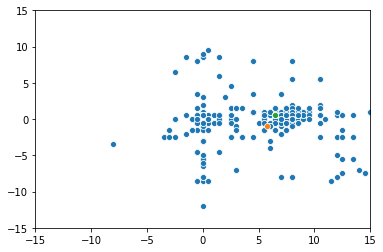

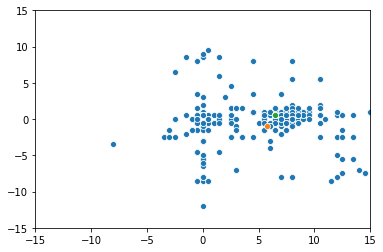

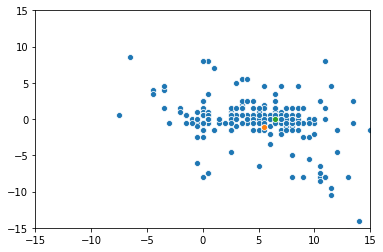

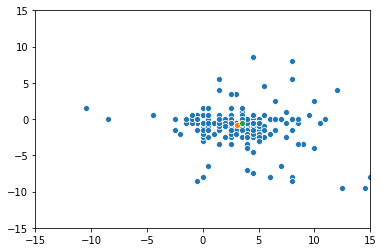

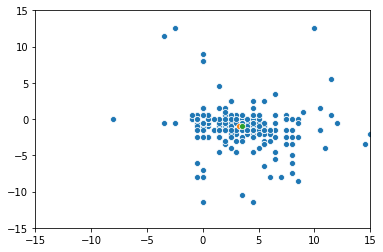

In [42]:
for frame_idx in range(95, 100):
    f, ax = plt.subplots()
    xc, yc = mv_components(motion_vector_subsets[frame_idx][1])
    mean_xc = [np.mean(xc)]
    mean_yc = [np.mean(yc)]
    median_xc = [np.median(xc)]
    median_yc = [np.median(yc)]
    ax.set_xlim([-15,15])
    ax.set_ylim([-15,15])
    sns.scatterplot(xc, yc, ax=ax)
    sns.scatterplot(mean_xc, mean_yc, ax=ax)
    sns.scatterplot(median_xc, median_yc, ax=ax)
    plt.show()

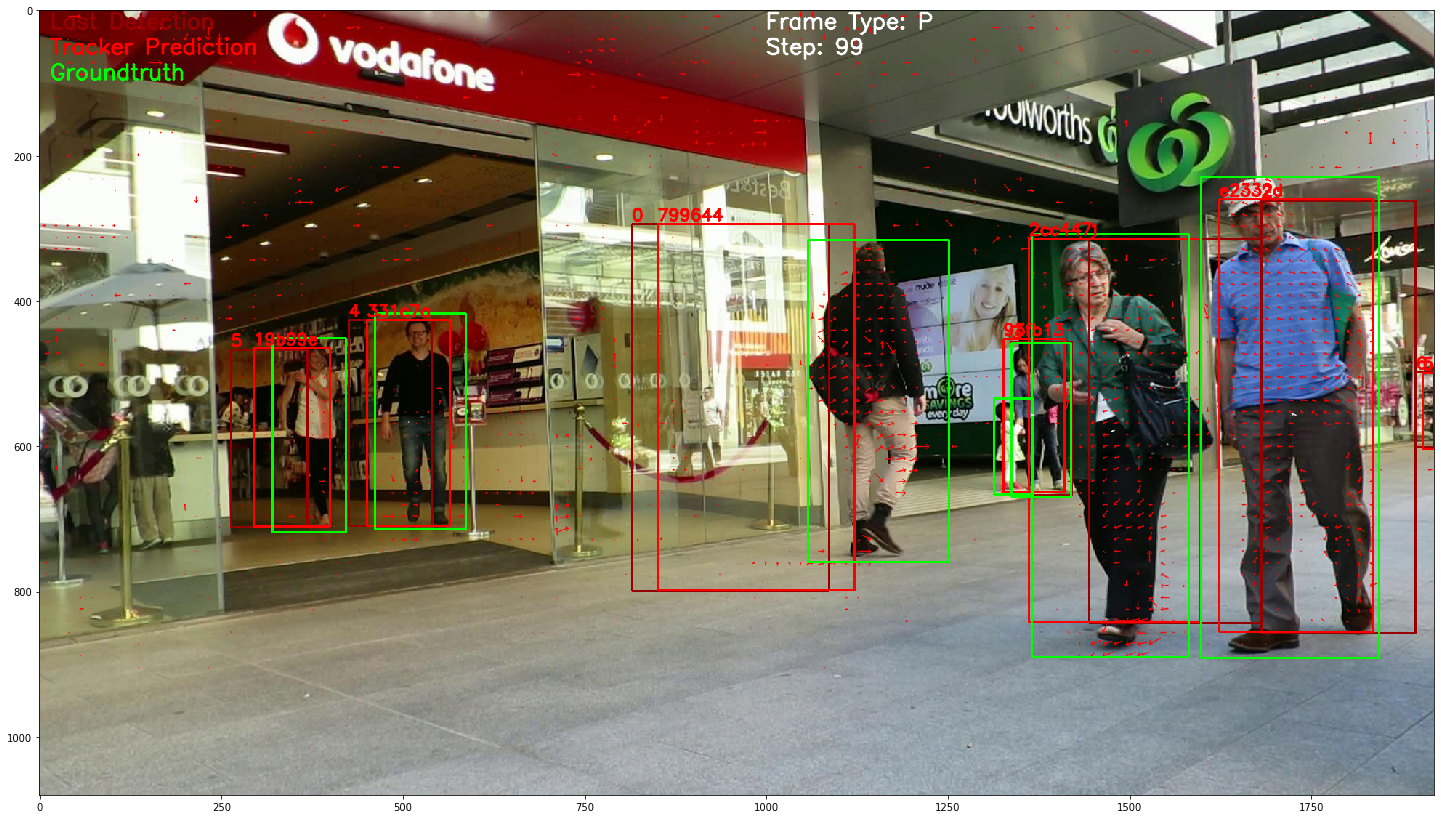

In [47]:
f, ax = plt.subplots(figsize=(25,15))
ax.imshow(frames[frame_idx])
plt.show()

In [55]:
motion_vector_subsets[101][1][80:90, :]

array([[ -1,  16,  16, 534, 677, 536, 680,  -5,  -7,   2],
       [ -1,  16,  16, 472, 696, 472, 696,   1,   1,   2],
       [ -1,  16,  16, 480, 697, 488, 696, -17,   3,   2],
       [ -1,  16,  16, 501, 696, 504, 696,  -7,   1,   2],
       [ -1,  16,  16, 518, 693, 520, 696,  -5,  -7,   2],
       [ -1,  16,  16, 534, 689, 536, 696,  -5, -15,   2],
       [ -1,  16,  16, 568, 696, 568, 696,  -1,  -1,   2],
       [ -1,  16,  16, 472, 712, 472, 712,   1,  -1,   2],
       [ -1,  16,  16, 480, 712, 488, 712, -17,   1,   2],
       [ -1,  16,  16, 519, 711, 520, 712,  -3,  -3,   2]], dtype=int32)